# TP Final - Análisis de Series Temporales - Especialización en Inteligencia Artificial

### Realizar el **análisis espectral** de la serie original. Hallar las frecuencias principales y comparar con las **componentes cíclica y estacional** usando la descomposición.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.stattools import adfuller, kpss
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime
from scipy.stats import boxcox 
from statsmodels.tsa.statespace import sarimax
from scipy import signal
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='survey_date'>

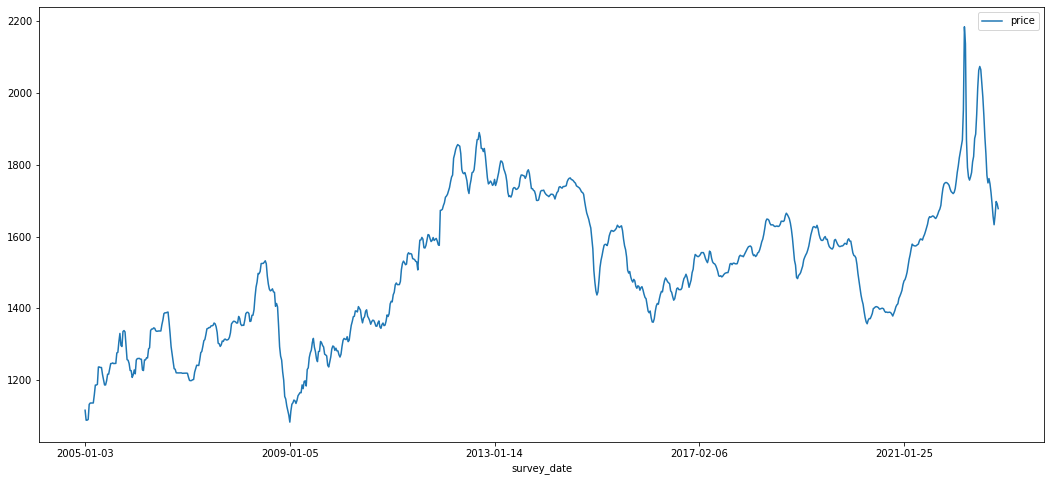

In [2]:
df = pd.read_csv("datasets/weekly_fuel_prices_all_data_from_2005_to_20221102.csv", index_col=0)
df = df.sort_values(by="survey_date")
matplotlib.rcParams['figure.figsize'] = [18,8]
df=df.groupby('product_name')['price'].get_group('Euro-Super 95')
df.plot(legend=True)

In [3]:
df.reset_index()

,survey_date,price
0,2005-01-03,1115.75
1,2005-01-10,1088.00
2,2005-01-17,1088.14
3,2005-01-24,1090.01
4,2005-01-31,1132.11
...,...,...
888,2022-10-03,1632.81
889,2022-10-10,1659.78
890,2022-10-17,1697.59
891,2022-10-24,1691.24


Text(0, 0.5, 'Densidad Espectral de Potencia')

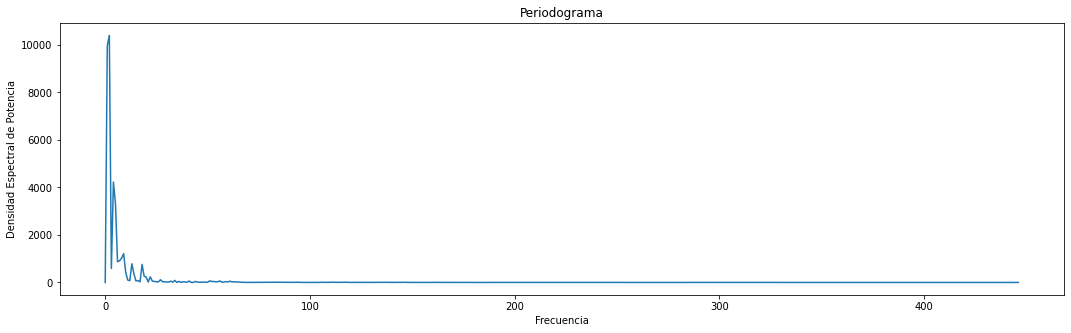

In [4]:
N = len(df)
f, Pxx_den = signal.periodogram(df, N)
plt.figure(figsize=(18,5))
plt.plot(f, Pxx_den)
plt.title('Periodograma')
plt.xlabel('Frecuencia')
plt.ylabel('Densidad Espectral de Potencia')

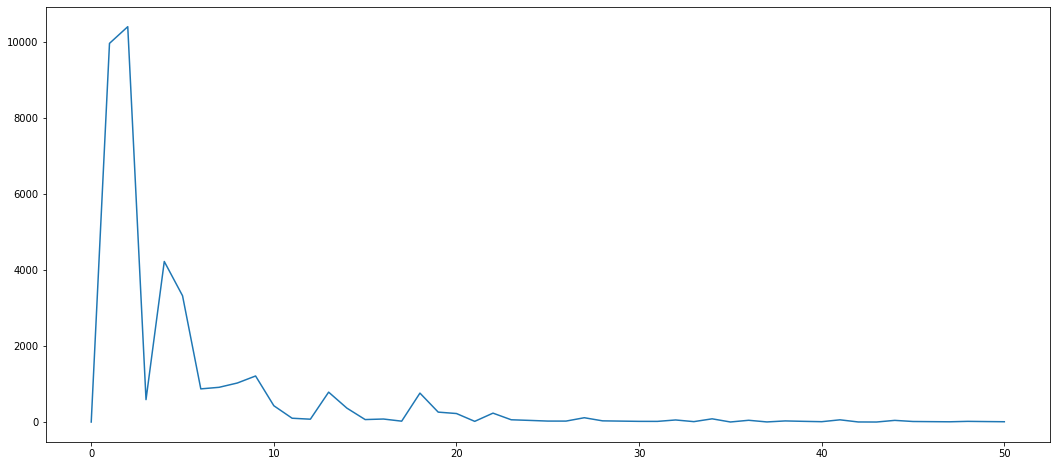

In [5]:
periodogram = pd.DataFrame(f, columns=['freq'])
periodogram['PSD'] = Pxx_den
periodogram.set_index(keys='freq', inplace=True)
plt.plot(periodogram.PSD[0:50])

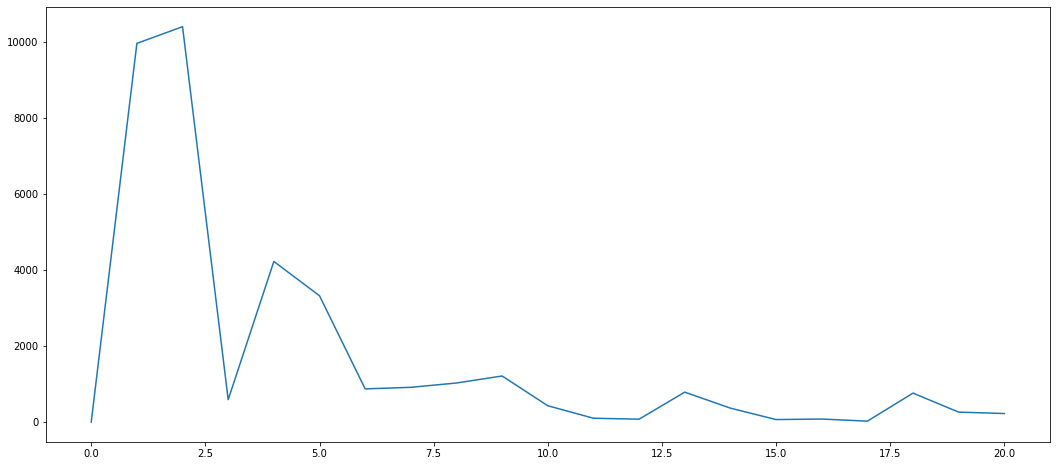

In [20]:
periodogram = pd.DataFrame(f, columns=['freq'])
periodogram['PSD'] = Pxx_den
periodogram.set_index(keys='freq', inplace=True)
plt.plot(periodogram.PSD[0:20])

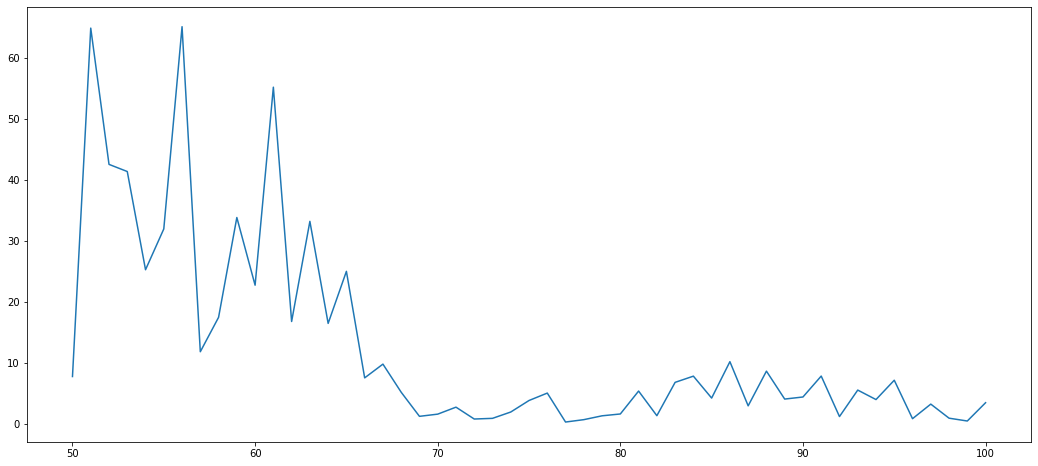

In [6]:
periodogram = pd.DataFrame(f, columns=['freq'])
periodogram['PSD'] = Pxx_den
periodogram.set_index(keys='freq', inplace=True)
plt.plot(periodogram.PSD[50:100])

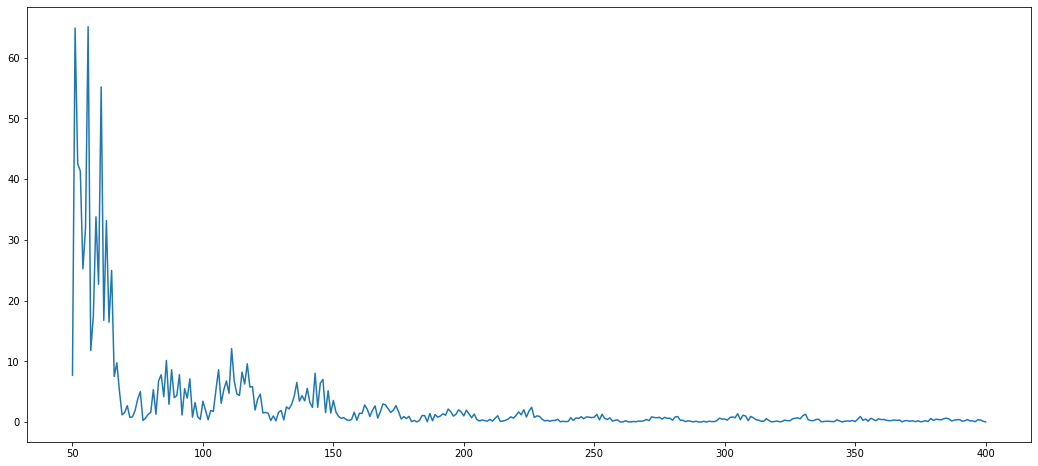

In [7]:
periodogram = pd.DataFrame(f, columns=['freq'])
periodogram['PSD'] = Pxx_den
periodogram.set_index(keys='freq', inplace=True)
plt.plot(periodogram.PSD[50:400])

Text(0, 0.5, 'Densidad Espectral de Potencia')

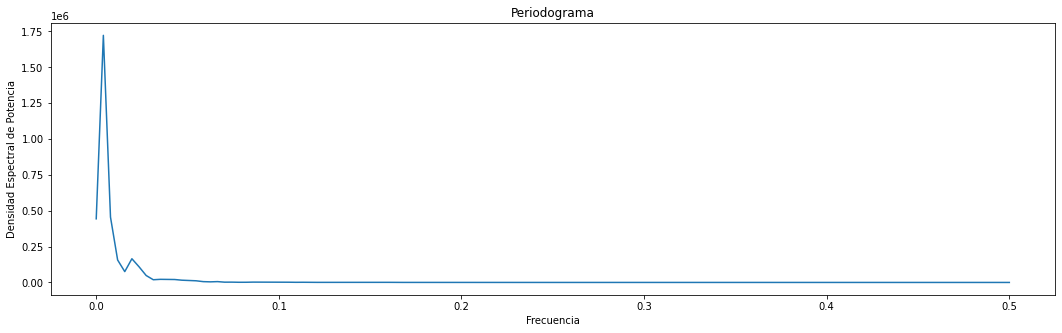

In [8]:
f, Pxx_den = signal.welch(df)
plt.figure(figsize=(18,5))
plt.plot(f, Pxx_den)
plt.title('Periodograma')
plt.xlabel('Frecuencia')
plt.ylabel('Densidad Espectral de Potencia')

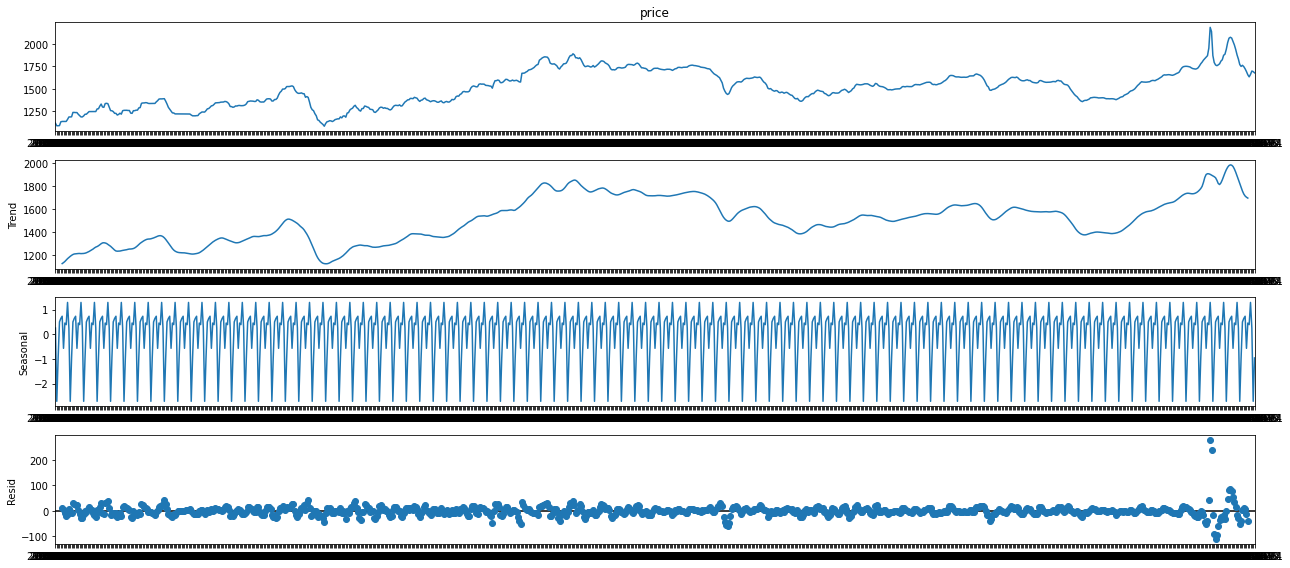

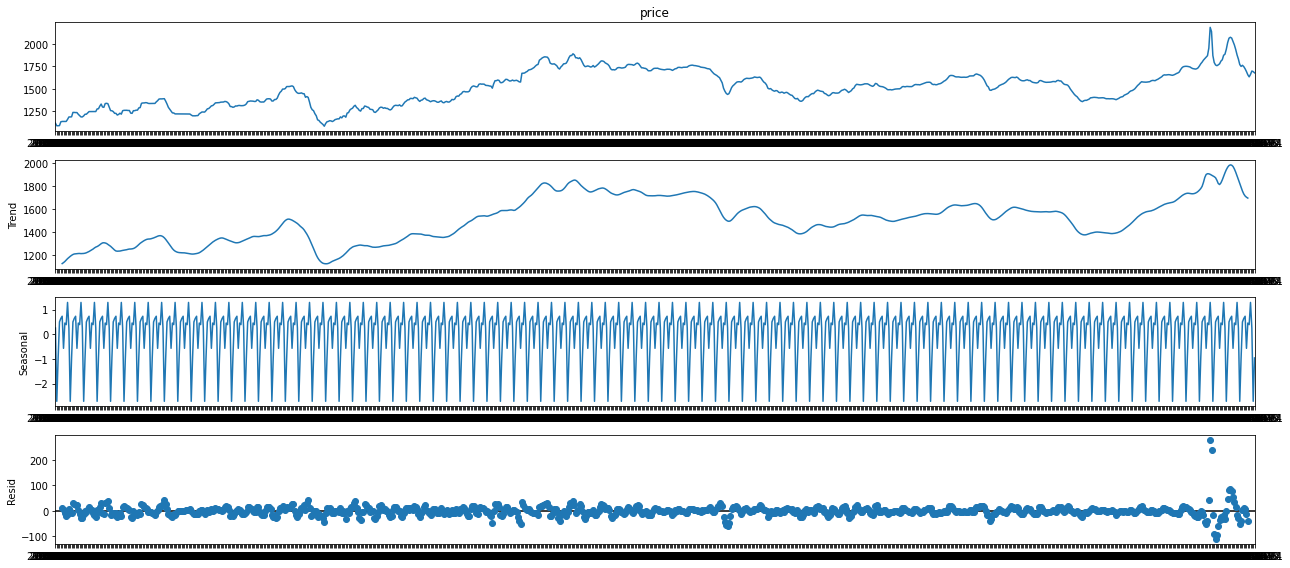

In [9]:
addit = sm.tsa.seasonal_decompose(df, model='additive', period=10)
addit.plot()

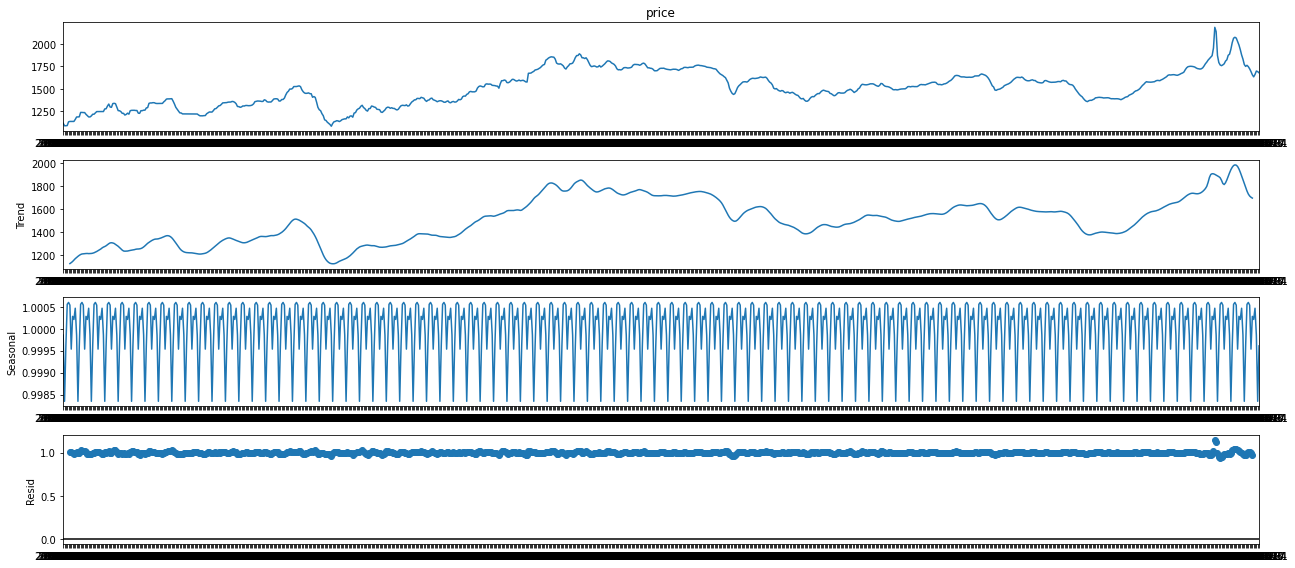

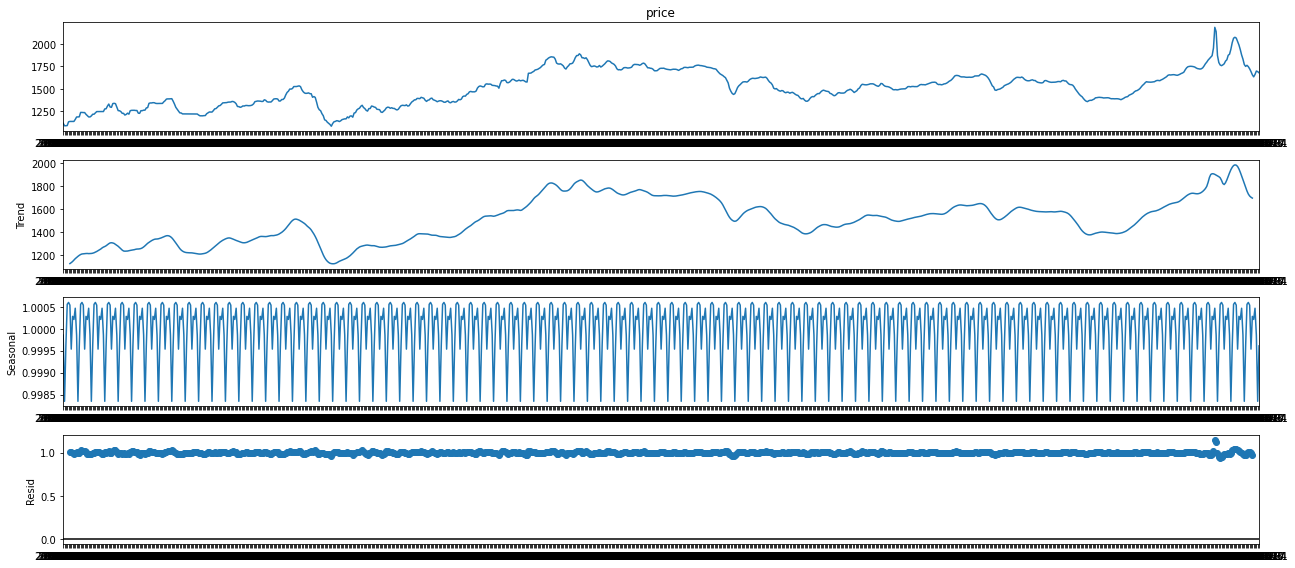

In [10]:
mult = sm.tsa.seasonal_decompose(df, model='multiplicative', period=10)
mult.plot()

Text(0, 0.5, 'Densidad Espectral de Potencia')

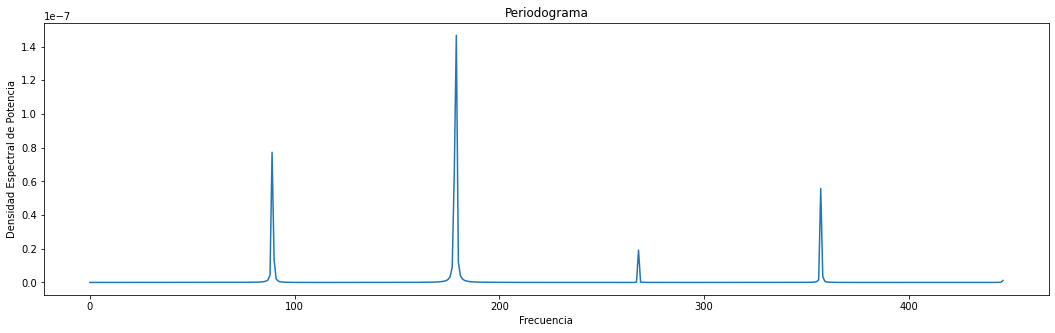

In [11]:
N = len(mult.seasonal)
f, Pxx_den = signal.periodogram(mult.seasonal, N)
plt.figure(figsize=(18,5))
plt.plot(f, Pxx_den)
plt.title('Periodograma') 
plt.xlabel('Frecuencia')
plt.ylabel('Densidad Espectral de Potencia')

Text(0, 0.5, 'Densidad Espectral de Potencia')

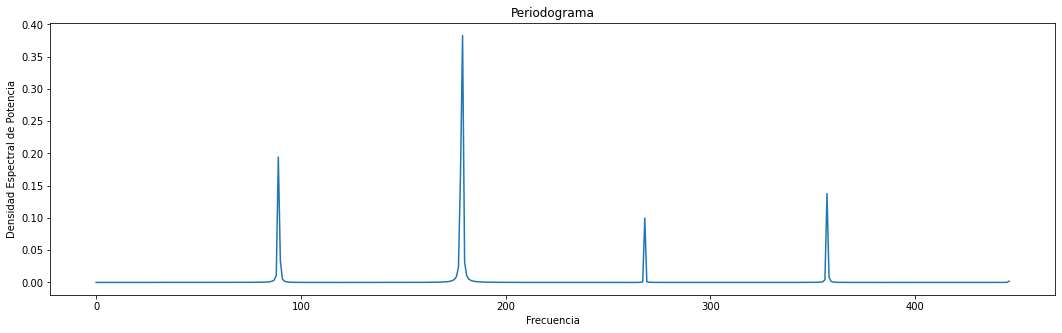

In [12]:
N = len(addit.seasonal)
f, Pxx_den = signal.periodogram(addit.seasonal, N)
plt.figure(figsize=(18,5))
plt.plot(f, Pxx_den)
plt.title('Periodograma') 
plt.xlabel('Frecuencia')
plt.ylabel('Densidad Espectral de Potencia')

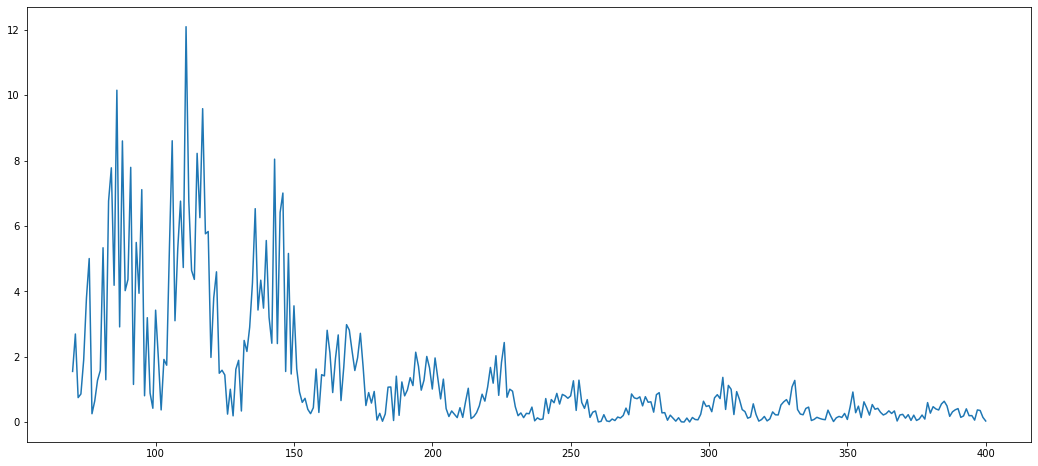

In [19]:
N = len(df)
f, Pxx_den = signal.periodogram(df, N)
periodogram = pd.DataFrame(f, columns=['freq'])
periodogram['PSD'] = Pxx_den
periodogram.set_index(keys='freq', inplace=True)
plt.plot(periodogram.PSD[70:400])

Tomando en cuenta los periodogramas de la serie temporal completa (figura anterior, entre las frecuencias de 70 a 400 Hz o "veces por semana en nuestro caso") y los periodogramas de la componente Seasonal de la descomposición tanto aditiva como multiplicativa, se pueden observar que se encuentran casi coincidentes las armónicas en 90, 180 y 270 Hz. 
Las restantes armónicas del dataset completo, no se encuentran presentes en las de la componente seasonal sinó que debe provenir de la tendencia de la serie. La misma tiene componentes muy marcadas en las armónicas de 2, 4, 8, 13 y 18Hz. 